In [9]:
#Calculate daily averages for temperature, humidity, and precipitation (if you have the precipitation amount).

import pandas as pd

df = pd.read_csv('weatherHistory.csv')

df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

df['Date'] = df['Formatted Date'].dt.date

daily_averages = df.groupby('Date').agg({
    'Temperature (C)': 'mean',
    'Humidity': 'mean'
}).reset_index()

# Display the results
print(daily_averages[['Date', 'Temperature (C)', 'Humidity']])


            Date  Temperature (C)  Humidity
0     2005-12-31         0.577778  0.890000
1     2006-01-01         4.075000  0.817083
2     2006-01-02         5.263194  0.847083
3     2006-01-03         2.340509  0.897083
4     2006-01-04         2.251852  0.906667
...          ...              ...       ...
4014  2016-12-27         0.278009  0.890000
4015  2016-12-28         0.222222  0.890000
4016  2016-12-29         0.167824  0.889583
4017  2016-12-30         0.117593  0.889167
4018  2016-12-31         0.113527  0.886522

[4019 rows x 3 columns]


In [11]:
#Calculate the monthly mode for the precipitation type if your dataset lacks the precipitation amount but includes the precipitation type column

df = pd.read_csv('weatherHistory.csv')

df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

df['Month'] = df['Formatted Date'].dt.to_period('M')

monthly_mode = df.groupby('Month')['Precip Type'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

df = pd.merge(df, monthly_mode, on='Month', how='left', suffixes=('', '_Mode'))

print(df[['Formatted Date', 'Precip Type', 'Month', 'Precip Type_Mode']])


                 Formatted Date Precip Type    Month Precip Type_Mode
0     2006-03-31 22:00:00+00:00        rain  2006-03             rain
1     2006-03-31 23:00:00+00:00        rain  2006-03             rain
2     2006-04-01 00:00:00+00:00        rain  2006-04             rain
3     2006-04-01 01:00:00+00:00        rain  2006-04             rain
4     2006-04-01 02:00:00+00:00        rain  2006-04             rain
...                         ...         ...      ...              ...
96448 2016-09-09 17:00:00+00:00        rain  2016-09             rain
96449 2016-09-09 18:00:00+00:00        rain  2016-09             rain
96450 2016-09-09 19:00:00+00:00        rain  2016-09             rain
96451 2016-09-09 20:00:00+00:00        rain  2016-09             rain
96452 2016-09-09 21:00:00+00:00        rain  2016-09             rain

[96453 rows x 4 columns]


C:\Users\Miro-\AppData\Local\Temp\ipykernel_23980\3883468614.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['Formatted Date'].dt.to_period('M')


In [10]:
#Handle any missing or erroneous data

df = pd.read_csv('weatherHistory.csv')


missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

df = df.dropna()

df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

df['Date'] = df['Formatted Date'].dt.date

df = df[df['Temperature (C)'] >= -273.15]

daily_averages = df.groupby('Date').agg({
    'Temperature (C)': 'mean',
    'Humidity': 'mean'
}).reset_index()

print(daily_averages[['Date', 'Temperature (C)', 'Humidity']])


Missing Values:
 Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64
            Date  Temperature (C)  Humidity
0     2005-12-31         0.577778  0.890000
1     2006-01-01         4.075000  0.817083
2     2006-01-02         5.263194  0.847083
3     2006-01-03         2.340509  0.897083
4     2006-01-04         2.251852  0.906667
...          ...              ...       ...
4004  2016-12-27         0.278009  0.890000
4005  2016-12-28         0.222222  0.890000
4006  2016-12-29         0.167824  0.889583
4007  2016-12-30         0.117593  0.889167
4008  2016-12-31         0.113527  0.886522

[4009 rows x 3 columns]


In [12]:
#Check for duplicates and remove them if necessary.

df = pd.read_csv('weatherHistory.csv')

duplicate_rows = df[df.duplicated()]
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

df = df.drop_duplicates()

print("After removing duplicates:")
print(df.head())

df.to_csv('cleaned_weather_data.csv', index=False)


Duplicate Rows except first occurrence:
                      Formatted Date        Summary Precip Type  \
36072  2010-08-02 00:00:00.000 +0200          Clear        rain   
36073  2010-08-02 01:00:00.000 +0200          Clear        rain   
36074  2010-08-02 02:00:00.000 +0200          Clear        rain   
36075  2010-08-02 03:00:00.000 +0200          Clear        rain   
36076  2010-08-02 04:00:00.000 +0200          Clear        rain   
36077  2010-08-02 05:00:00.000 +0200          Clear        rain   
36078  2010-08-02 06:00:00.000 +0200          Clear        rain   
36079  2010-08-02 07:00:00.000 +0200          Clear        rain   
36080  2010-08-02 08:00:00.000 +0200          Clear        rain   
36081  2010-08-02 09:00:00.000 +0200          Clear        rain   
36082  2010-08-02 10:00:00.000 +0200          Clear        rain   
36083  2010-08-02 11:00:00.000 +0200          Clear        rain   
36084  2010-08-02 12:00:00.000 +0200          Clear        rain   
36085  2010-08-02 13:0

In [13]:
#Add a new feature to the dataset which categorizes the Wind Strength.

df = pd.read_csv('weatherHistory.csv')

def categorize_wind_strength(speed):
    if speed <= 1.5:
        return 'Calm'
    elif 1.6 <= speed <= 3.3:
        return 'Light Air'
    elif 3.4 <= speed <= 5.4:
        return 'Light Breeze'
    elif 5.5 <= speed <= 7.9:
        return 'Gentle Breeze'
    elif 8.0 <= speed <= 10.7:
        return 'Moderate Breeze'
    elif 10.8 <= speed <= 13.8:
        return 'Fresh Breeze'
    elif 13.9 <= speed <= 17.1:
        return 'Strong Breeze'
    elif 17.2 <= speed <= 20.7:
        return 'Near Gale'
    elif 20.8 <= speed <= 24.4:
        return 'Gale'
    elif 24.5 <= speed <= 28.4:
        return 'Strong Gale'
    elif 28.5 <= speed <= 32.6:
        return 'Storm'
    else:
        return 'Violent Storm'

df['Wind Strength'] = df['Wind Speed (km/h)'].apply(categorize_wind_strength)

print(df[['Formatted Date', 'Wind Speed (km/h)', 'Wind Strength']].head())


                  Formatted Date  Wind Speed (km/h)  Wind Strength
0  2006-04-01 00:00:00.000 +0200            14.1197  Strong Breeze
1  2006-04-01 01:00:00.000 +0200            14.2646  Strong Breeze
2  2006-04-01 02:00:00.000 +0200             3.9284   Light Breeze
3  2006-04-01 03:00:00.000 +0200            14.1036  Strong Breeze
4  2006-04-01 04:00:00.000 +0200            11.0446   Fresh Breeze


In [16]:
#Further, calculate additional statistics or aggregates (e.g., monthly averages)

df = pd.read_csv('cleaned_weather_data.csv')

df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

df['Month'] = df['Formatted Date'].dt.to_period('M')

monthly_averages = df.groupby('Month').agg({
    'Temperature (C)': 'mean',
    'Humidity': 'mean',
}).reset_index()

print(monthly_averages)

monthly_averages.to_csv('monthly_averages.csv', index=False)


       Month  Temperature (C)  Humidity
0    2005-12         0.577778  0.890000
1    2006-01        -1.677942  0.834610
2    2006-02        -0.065394  0.843467
3    2006-03         4.559274  0.778737
4    2006-04        12.635031  0.728625
..       ...              ...       ...
128  2016-08        21.420296  0.674046
129  2016-09        18.467924  0.688833
130  2016-10         9.893242  0.799906
131  2016-11         5.282662  0.848472
132  2016-12         1.239158  0.887981

[133 rows x 3 columns]


C:\Users\Miro-\AppData\Local\Temp\ipykernel_23980\549984691.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['Formatted Date'].dt.to_period('M')


In [19]:
#Additional Statistics (Optional – extra 2 points)

df = pd.read_csv('cleaned_weather_data.csv')

#Convert 'Formatted Date' to datetime format
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

#Extract month for grouping
df['Month'] = df['Formatted Date'].dt.to_period('M')

# Calculate monthly statistics
monthly_statistics = df.groupby('Month').agg({
    'Temperature (C)': ['mean', 'std', 'min', 'max'],
    'Humidity': ['mean', 'std', 'min', 'max'],

}).reset_index()

#Flatten the multi-level columns
monthly_statistics.columns = [' '.join(col).strip() for col in monthly_statistics.columns.values]

print(monthly_statistics)

monthly_statistics.to_csv('monthly_statistics.csv', index=False)


       Month  Temperature (C) mean  Temperature (C) std  Temperature (C) min  \
0    2005-12              0.577778                  NaN             0.577778   
1    2006-01             -1.677942             4.574277           -14.088889   
2    2006-02             -0.065394             4.565373           -13.927778   
3    2006-03              4.559274             5.720287           -10.100000   
4    2006-04             12.635031             4.773577             0.955556   
..       ...                   ...                  ...                  ...   
128  2016-08             21.420296             5.118644             8.988889   
129  2016-09             18.467924             6.113948             5.955556   
130  2016-10              9.893242             4.111620             0.994444   
131  2016-11              5.282662             2.544971             0.522222   
132  2016-12              1.239158             1.891595            -2.177778   

     Temperature (C) max  Humidity mean

C:\Users\Miro-\AppData\Local\Temp\ipykernel_23980\2453226385.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['Formatted Date'].dt.to_period('M')


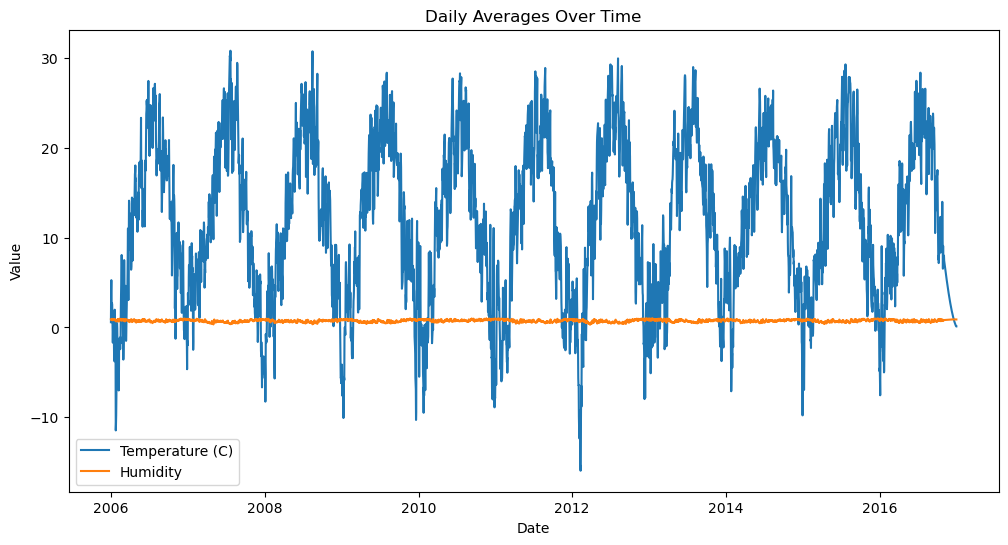

In [21]:
#Data Visualization (Optional – extra 8 points)

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_weather_data.csv')

df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

#Extract date for grouping
df['Date'] = df['Formatted Date'].dt.date

#Calculate daily averages
daily_averages = df.groupby('Date').agg({
    'Temperature (C)': 'mean',
    'Humidity': 'mean',
}).reset_index()

#A line chart for daily averages over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Temperature (C)', data=daily_averages, label='Temperature (C)')
sns.lineplot(x='Date', y='Humidity', data=daily_averages, label='Humidity')

plt.title('Daily Averages Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [22]:
#Store Transformed Data

df = pd.read_csv('cleaned_weather_data.csv')

df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

df['Month'] = df['Formatted Date'].dt.to_period('M')

monthly_averages = df.groupby('Month').agg({
    'Temperature (C)': 'mean',
    'Humidity': 'mean',
}).reset_index()

# Save the monthly averages to a CSV file
monthly_averages.to_csv('monthly_averages.csv', index=False)

print("Monthly averages saved to 'monthly_averages.csv'")


Monthly averages saved to 'monthly_averages.csv'


C:\Users\Miro-\AppData\Local\Temp\ipykernel_23980\4131240907.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['Formatted Date'].dt.to_period('M')
